In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
dir_string = 'C:/Users/rannu/OneDrive - NTNU/Desktop/VsPython/'+\
                'Spain/NMfDS/Assignments/'
sys.path.append(dir_string + 'Ass4')
sys.path.append(dir_string + 'Ass6')
sys.path.append(dir_string + 'Ass7')
sys.path.append(dir_string + 'Ass8')
from RTBP_definitions import r1, r2, OMEGA, ODE_R3BP, Jacobi_first_integral
from Lagrange_computations import compute_Lagrange_pt, compute_jacobi_const_Li
from custom_ODE_solver import ODE_solver
from PoincareR3BP import poincare_map_solve_ivp_R3BP
from variational_equation_RTBP import variational_eq

In [2]:
mu = 0.1
print(compute_Lagrange_pt(mu, 3))
L3 = [compute_Lagrange_pt(mu, 3), 0, 0, 0] # where mu = 0.1
# L3 = np.array([1.0828394642022439, 0, 0, 0]) # where mu = 0.2
L3.extend([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])  # initial conditions and identity matrix
time_span = 0

# compute the Jacobian matrix of the RTBP at Li.
# The eigenvalues of this matrix are the frequencies of the periodic orbit

A = variational_eq(time_span, L3, mu, 1)[4:20].reshape(4,4)
print('det(A) = \n', A)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
lambda_neg = eigenvalues[2].real
eigvec_pos = eigenvectors[:,3]
eigvec_neg = eigenvectors[:,2]
print('\neigenvalues = \n', lambda_pos, ",", lambda_neg)
print('\nTheir respective normalized eigenvectors = \n', -eigvec_pos.real, \
      ",\n", eigvec_neg.real)
# Only the real part of the eigenvectors are needed

1.0416089085718845
det(A) = 
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 3.18338396  0.          0.          2.        ]
 [ 0.         -0.09169198 -2.          0.        ]]

eigenvalues = 
 0.5016383507584008 , -0.5016383507584007

Their respective normalized eigenvectors = 
 [ 0.28940578 -0.84569227  0.14517704 -0.42423167] ,
 [-0.28940578 -0.84569227  0.14517704  0.42423167]


### For the UNSTABLE manifold: Wu
3.1 we want the eigenvector that
corresponds to the eigenvalue with lambda >0.

3.2 Enter as input a sign (iregion=+1 or iregion=-1) and as ouput obtain
the ASSOCIATED eigenvector. We call it v.

3.3 Consider as initial condition L_i+sv with s=1.d-6, integrate
forward in time this orbit (which will be the ’real’ unstable
manifold of L_i) up to a given section (y=0) and
a given crossing (call it n_crossing) and try
n_crossing=1, 2 and 3.

3.4 Repeat the computation with s =1.d-5 and s=1.d-7 and check
that the output points are ’the same’.

Remark: 1. Check for each point of the integration that the Jacobi
constant remains constant.


c:\Users\rannu\OneDrive - NTNU\Desktop\VsPython\ntnusession\lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


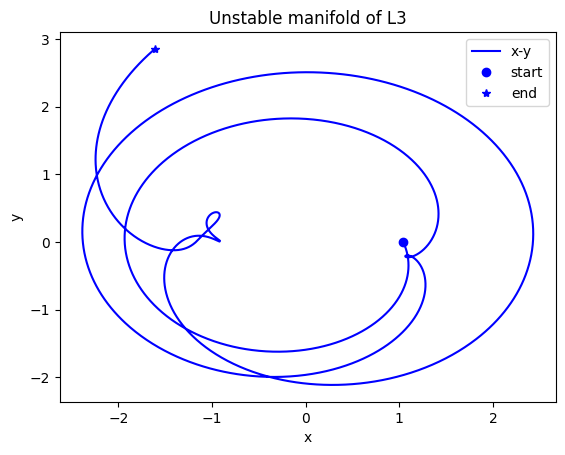

In [3]:
# Now only for the unstable manifold, aka lambda_pos

iregion = 1

A = variational_eq(time_span, L3, mu, iregion)[4:20].reshape(4,4)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
eigvec_pos = eigenvectors[:,3]
v = -eigvec_pos.real
init_cond = L3[0:4] + v*10**-6

# Solve the R3BP equations
t0 = 0
tmax = 60
dt = 0.01
t_span = np.arange(t0, tmax, dt)

# Solve ode_r3bp using the custom ODE solver, ODE_solver(func, x0, t_max, eval_pts, tol=1e-12, t_min=0, method='DOP853', hamiltonian=0):

# RETURNS: the solution of the system of ODEs as a scipy.integrate.solve_ivp object
sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax, len(t_span), tol=1e-12, method='DOP853', hamiltonian=0)

# Extract the solution
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

# plot the solution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'b', label='x-y')
ax.plot(x[0], y[0], 'bo', label='start')
ax.plot(x[-1], y[-1], 'b*', label='end')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Unstable manifold of L3')
ax.legend()
plt.show()

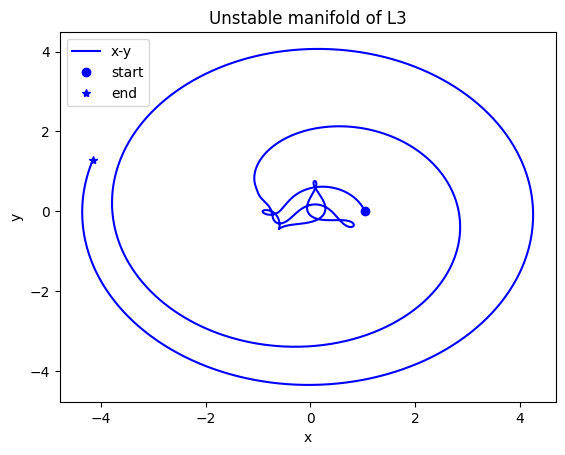

In [4]:
# Now only for the stable manifold, aka lambda_pos

iregion = -1

A = variational_eq(time_span, L3, mu, iregion)[4:20].reshape(4,4)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_neg = eigenvalues[2].real
eigvec_neg = eigenvectors[:,2]
v = eigvec_neg.real
init_cond = L3[0:4] + v*10**-6

# Solve the variational equations
t0 = 0
tmax = 55
dt = 0.01
t_span = np.arange(t0, tmax, dt)

# Solve ode_r3bp using the custom ODE solver, ODE_solver(func, x0, t_max, eval_pts, tol=1e-12, t_min=0, method='DOP853', hamiltonian=0):

# RETURNS: the solution of the system of ODEs as a scipy.integrate.solve_ivp object
sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax, len(t_span), tol=1e-12, method='DOP853', hamiltonian=0)
#print(sol)
# Extract the solution
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

# plot the solution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'b', label='x-y')
ax.plot(x[0], y[0], 'bo', label='start')
ax.plot(x[-1], y[-1], 'b*', label='end')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Unstable manifold of L3')
ax.legend()
plt.show()

In [5]:
def poincare_map_solve_ivp_R3BP_exp(ODE_R3BP, initial_conditions, dir,
                                step, t_span, mu, scaling):
    # Procedure to compute when the x-axis is crossed
    # for the first time
    product = 1
    time = 0
    startPoint = np.array(initial_conditions)
    initial_conditions = initial_conditions

    while product >= 0 and abs(time) < abs(step*scaling):
        solution = ODE_solver(ODE_R3BP, startPoint, t_span[1], 1000,
                              t_min=t_span[0],
                              hamiltonian=lambda X: Jacobi_first_integral(mu, X[0], X[1],
                                                                          X[2], X[3]))
        Y = solution.y.T  # Transposing to match previous structure
        product = Y[1, 1] * Y[-1, 1]  # Check if x-axis is crossed
        #print(Y[-1, ])
        startPoint = Y[-1, :]
        t_span = [t_span[0] + dir * step, t_span[1] + dir * step]
        time += step*dir
    # make an error if the x-axis is never crossed
    print("Crossing time ratio:", abs(time)/(step*scaling))
    print("Crossing time:", time)
    if abs(time) >= abs(step*3000):
        raise ValueError("No crossing found, initial search failed" + "\ntime:  " + str(time) +
                         "\nproduct  " + str(product))
    # Procedure to compute the exact time of the crossing
    for i in range(300):
        solution = ODE_solver(ODE_R3BP, initial_conditions, time, 1000,
                              hamiltonian=lambda X: Jacobi_first_integral(mu, X[0], X[1],
                                                                          X[2], X[3]))
        Y = solution.y.T
        # One iteration of Newton's method.
        difference = Y[-1, 1] / ODE_R3BP(0, Y[-1, :])[1]
        time -= difference
        if i == 299:
            raise ValueError("No convergence, refinement failed" + 
                             "\ntime:  " + str(time) +
                             "\ndifference  " + str(difference))
        if abs(difference) < 1e-14:
            # print("Convergence after", i, "iterations")
            break

    TimeDuration = time
    newInitial = Y[-1, :]
    return newInitial, TimeDuration

iregion = 1

A = variational_eq(time_span, L3, mu, iregion)[4:20].reshape(4,4)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
eigvec_pos = eigenvectors[:,3]
v = -eigvec_pos.real
init_cond = L3[0:4] + v*10**-6

# Solve the variational equations
t0 = 0
tmax = 0.15
dt = 0.1
t_span = np.arange(t0, tmax, dt)

# Solve the variational equations using
# poincare_map_solve_ivp_R3BP(ODE_R3BP, initial_conditions, dir, step, t_span, mu)

newInitial, TimeDuration1 = poincare_map_solve_ivp_R3BP_exp(lambda t, X: ODE_R3BP(t, mu, X), 
                                                       init_cond, 
                                                       iregion, dt, t_span, mu, 2000)

print("\nTime duration of the unstable manifold = ", TimeDuration1)
print("\nInitial conditions of the unstable manifold = ", newInitial)

newInitial, TimeDuration2 = poincare_map_solve_ivp_R3BP_exp(lambda t, X: ODE_R3BP(t, mu, X), 
                                                       newInitial, 
                                                       iregion, dt, t_span, mu, 2000)

print("\nTime duration of the unstable manifold = ", TimeDuration2)
print("\nInitial conditions of the unstable manifold = ", newInitial)


Crossing time ratio: 0.16250000000000095
Crossing time: 32.50000000000019

Time duration of the unstable manifold =  32.46888568561305

Initial conditions of the unstable manifold =  [-1.93098638e+00 -2.11636264e-15 -4.45099793e-02  1.30667783e+00]
Crossing time ratio: 0.027499999999999983
Crossing time: 5.4999999999999964

Time duration of the unstable manifold =  5.443991521494868

Initial conditions of the unstable manifold =  [ 1.32786837e+00  5.55111512e-17 -2.08286275e-01 -4.19523745e-01]


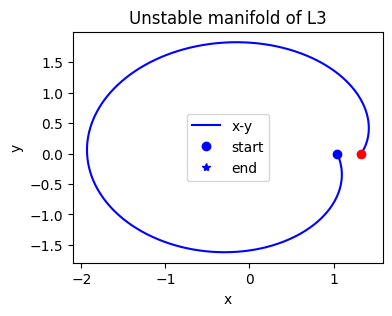

In [6]:
# Solve the R3BP equations
t0 = 0
tmax = TimeDuration1 + TimeDuration2
dt = 0.01
t_span = np.arange(t0, tmax, dt)

# Solve ode_r3bp using the custom ODE solver, ODE_solver(func, x0, t_max, eval_pts, tol=1e-12, t_min=0, method='DOP853', hamiltonian=0):

# RETURNS: the solution of the system of ODEs as a scipy.integrate.solve_ivp object
sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax, len(t_span), tol=1e-12, method='DOP853', hamiltonian=0)

# Extract the solution
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

# plot the solution
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b', label='x-y')
ax.plot(x[0], y[0], 'bo', label='start')
ax.plot(x[-1], y[-1], 'b*', label='end')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Unstable manifold of L3')
ax.legend()
ax.plot(newInitial[0], newInitial[1], 'ro', label='start')
plt.show()

Check that the .py works with the modifications

In [7]:
iregion = 1

A = variational_eq(time_span, L3, mu, iregion)[4:20].reshape(4,4)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
eigvec_pos = eigenvectors[:,3]
v = -eigvec_pos.real
init_cond = L3[0:4] + v*10**-6

# Solve the variational equations
t0 = 0
tmax = 0.15
dt = 0.1
t_span = np.arange(t0, tmax, dt)

refinement = 2000
refinement_fine = 300
tol = 1e-14

# Solve the variational equations using
# poincare_map_solve_ivp_R3BP(ODE_R3BP, initial_conditions, dir, step, t_span, mu)

newInitial, TimeDuration1 = poincare_map_solve_ivp_R3BP(lambda t, X: ODE_R3BP(t, mu, X), 
                                                       init_cond, 
                                                       iregion, dt, t_span, mu, 
                                                       refinement, refinement_fine, 
                                                       tol)

print("\nTime duration of the unstable manifold = ", TimeDuration1)
print("\nInitial conditions of the unstable manifold = ", newInitial)


Time duration of the unstable manifold =  32.46888568561305

Initial conditions of the unstable manifold =  [-1.93098638e+00 -2.11636264e-15 -4.45099793e-02  1.30667783e+00]


now create a crossing function

In [8]:
def crossings_R3BP(no_crossings, ODE_R3BP, initial_conditions, dir,
                                step, t_span, mu, init_search=100, 
                                refinement=100, newton_tol = 1e-15):
    # Procedure to compute when the x-axis is crossed
    # for no_crossings times
    # returns an array of the crossing times
    # and a 2d array of the initial conditions at all the crossings
    crossing_times = np.zeros(no_crossings)
    crossing_initials = np.zeros((no_crossings, 4))
    new_initial, time_duration = poincare_map_solve_ivp_R3BP\
                                                (ODE_R3BP, initial_conditions, dir,
                                                step, t_span, mu, init_search, 
                                                refinement, newton_tol)
    crossing_times[0] = time_duration
    crossing_initials[0] = new_initial

    for i in range(1, no_crossings):
        new_initial, time_duration = poincare_map_solve_ivp_R3BP\
                                        (ODE_R3BP, crossing_initials[i-1], dir,
                                        step, t_span, mu, init_search, 
                                        refinement, newton_tol)
        crossing_times[i] = time_duration
        crossing_initials[i] = new_initial
    
    return crossing_times, crossing_initials

iregion = 1

A = variational_eq(time_span, L3, mu, iregion)[4:20].reshape(4,4)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
eigvec_pos = eigenvectors[:,3]
v = -eigvec_pos.real
init_cond = L3[0:4] + v*10**-6

# Solve the variational equations
t0 = 0
tmax = 0.15
dt = 0.1
t_span = np.arange(t0, tmax, dt)

refinement = 2000
refinement_fine = 300
tol = 1e-14

# Solve the variational equations using
# poincare_map_solve_ivp_R3BP(ODE_R3BP, initial_conditions, dir, step, t_span, mu)

crossing_times, crossing_initials = crossings_R3BP(4, lambda t, X: ODE_R3BP(t, mu, X),
                                                         init_cond, 
                                                         iregion, dt, t_span, mu, 
                                                         refinement, refinement_fine, 
                                                         tol)

print("\nTime duration of the unstable manifold = ", crossing_times)
print("\nInitial conditions of the unstable manifold = ", crossing_initials)



Time duration of the unstable manifold =  [32.46888569  5.44399152  7.88305708  3.97209153]

Initial conditions of the unstable manifold =  [[-1.93098638e+00 -2.11636264e-15 -4.45099793e-02  1.30667783e+00]
 [ 1.32786837e+00  5.55111512e-17 -2.08286275e-01 -4.19523745e-01]
 [-2.37768905e+00 -6.55725474e-16 -1.28456504e-01  1.84367998e+00]
 [ 2.42624311e+00  2.77555756e-17 -1.00233312e-01 -1.90024696e+00]]


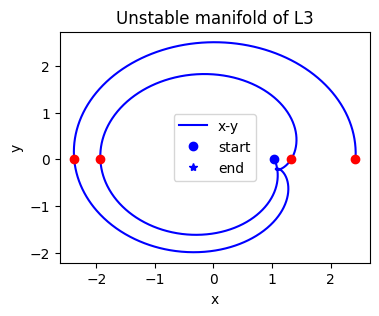

In [9]:
# Solve the R3BP equations
t0 = 0
tmax = sum(crossing_times)
dt = 0.01
t_span = np.arange(t0, tmax, dt)

# Solve ode_r3bp using the custom ODE solver, ODE_solver(func, x0, t_max, eval_pts, tol=1e-12, t_min=0, method='DOP853', hamiltonian=0):

# RETURNS: the solution of the system of ODEs as a scipy.integrate.solve_ivp object
sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax, len(t_span), tol=1e-12, method='DOP853', hamiltonian=0)

# Extract the solution
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

# plot the solution
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b', label='x-y')
ax.plot(x[0], y[0], 'bo', label='start')
ax.plot(x[-1], y[-1], 'b*', label='end')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Unstable manifold of L3')
ax.legend()
# plot all the crossings
for i in range(len(crossing_initials)):
    ax.plot(crossing_initials[i, 0], crossing_initials[i, 1], 'ro', label='start')
plt.show()

Package whole process into a function

In [10]:
def crossings_R3BP_by_mu(no_crossings, L123, ODE_R3BP, initial_conditions, dir,
                                step, t_span, mu, init_search=100, 
                                refinement=100, newton_tol = 1e-15,
                                start_cond_tol = 10**-6):
    Li = [compute_Lagrange_pt(mu, L123), 0, 0, 0] 
    Li.extend([1, 0, 0, 0, 
               0, 1, 0, 0, 
               0, 0, 1, 0, 
               0, 0, 0, 1])  # initial conditions and identity matrix
    time_span = 0

    # compute the Jacobian matrix of the RTBP at Li.
    # The eigenvalues of this matrix are the frequencies of the periodic orbit

    A = variational_eq(t_span[0], Li, mu, 1)[4:20].reshape(4,4)
    eigenvalues, eigenvectors = np.linalg.eig(A)
    lambda_pos = eigenvalues[3].real
    lambda_neg = eigenvalues[2].real
    eigvec_pos = eigenvectors[:,3]
    eigvec_neg = eigenvectors[:,2]
    if dir == 1:
        if eigvec_pos[1] > 0:
            eigvec_pos = -eigvec_pos
        v = eigvec_pos
    elif dir == -1:
        v = eigvec_neg.real
    else:
        raise ValueError("Direction must be 1 or -1")
    init_cond = Li[0:4] + v*start_cond_tol

    crossing_times, crossing_initials = \
        crossings_R3BP(no_crossings, ODE_R3BP, initial_conditions, dir, step, t_span, 
                       mu, init_search, refinement, newton_tol)
    
    return crossing_times, crossing_initials

In [11]:
# test the function
iregion = 1

# Solve the variational equations
t0 = 0
tmax = 0.15
dt = 0.1
t_span = np.arange(t0, tmax, dt)

refinement = 2000
refinement_fine = 300
tol = 1e-14

crossing_times, crossing_initials = \
    crossings_R3BP_by_mu(2, 3, lambda t, X: ODE_R3BP(t, mu, X),
                        init_cond, iregion, dt, t_span, mu, 
                        refinement, refinement_fine, tol)

print("\nTime duration of the unstable manifold = ", crossing_times)
print("\nInitial conditions of the unstable manifold = ", crossing_initials)



Time duration of the unstable manifold =  [32.46888569  5.44399152]

Initial conditions of the unstable manifold =  [[-1.93098638e+00 -2.11636264e-15 -4.45099793e-02  1.30667783e+00]
 [ 1.32786837e+00  5.55111512e-17 -2.08286275e-01 -4.19523745e-01]]
